A következő lekéréssel gyűjtöttem be a csillagokat:

--SELECT COUNT(*)<br />
SELECT TOP 1000 g.ra, g.dec--,g.r, g.petroRad_u,  g.petroRad_z,  g.petroRad_r,  g.petroRad_g,  g.petroRad_i <br />
FROM Galaxy g<br />
  INNER JOIN SpecObj s ON s.bestObjID = g.objID<br />
--WHERE g.ra BETWEEN 327.5 AND 338.5 AND g.dec BETWEEN -1.25 AND 1.25<br />
--  AND<br />
WHERE<br /> 
  ABS(g.b) > 10 AND<br />
  --  s.z BETWEEN 0.02 AND 0.025<br />
  s.z < 0.025 AND s.snMedian_r > 2<br />
 AND s.class = 'GALAXY'<br />
AND  (flags_r & 0x10000000) != 0 --/ BINNED1<br />
AND (flags_r & 0x40000) = 0 --/ not SATURATED<br />
  AND (flags_r & 0x80) = 0 --/ not NOPROFILE<br />
AND  (flags_r & 0x20) = 0 --/ not PEAKCENTER<br />
AND (flags_r & 0x80000) = 0 --/ not NOTCHECKED<br />
  AND ((flags_r & 0x400000000000) = 0 OR psfmagerr_r <= 0.2) --/ high S/N or not DEBLEND_NOPEAK<br />
 AND g.petroRad_u > 3 AND g.petroRad_z > 3 AND g.petroRad_r > 3 AND g.petroRad_g > 3 AND g.petroRad_i > 3<br />
  ORDER BY g.r DESC<br />

22400 galaxisból 19541 lett miután beraktam a minden szűrőben 3-nál nagyobb petroradot. Így a leghalványabb objektumok így néztek ki:

In [1]:
from IPython.display import Image

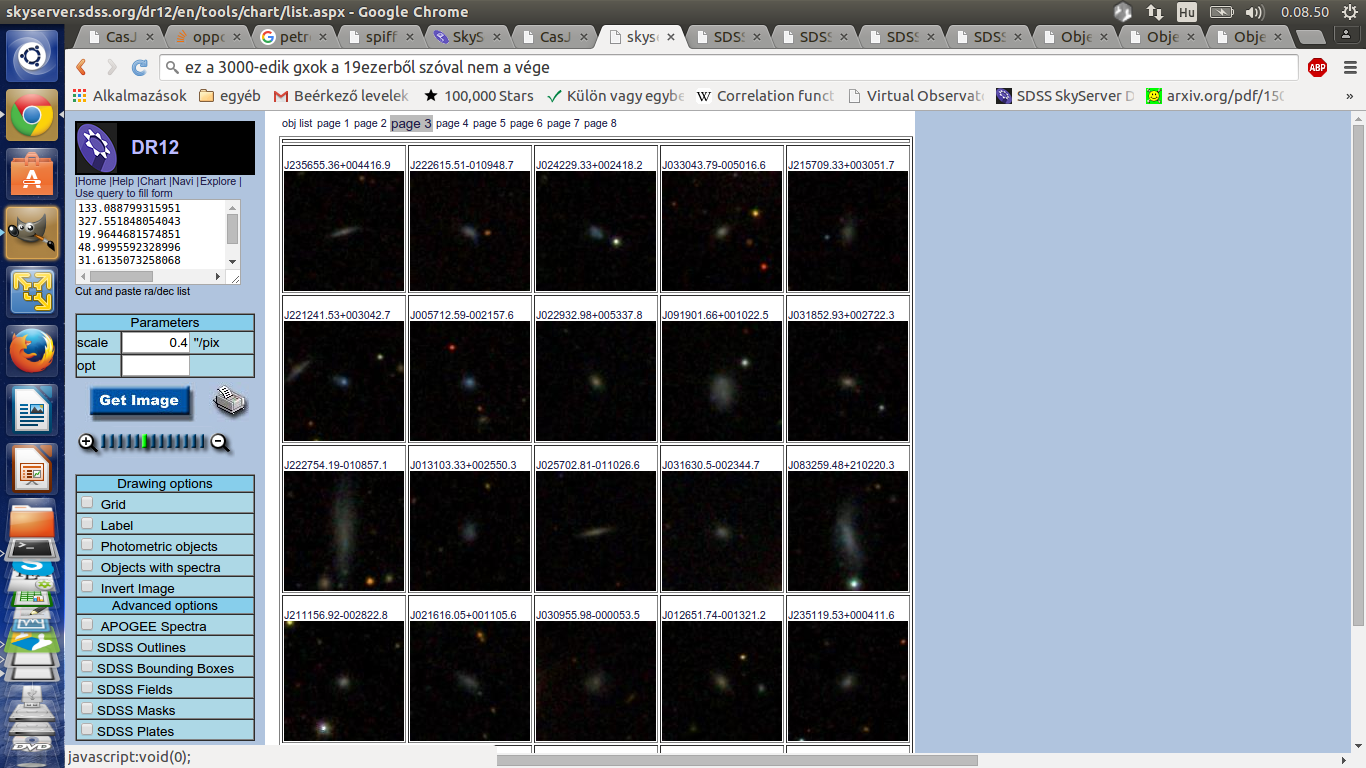

In [2]:
Image(filename='galaxies.png')

In [ ]:
--SELECT COUNT(*)
SELECT TOP 1000 g.ra, g.dec,   w.j_m_2mass, w.w1mag--,g.r, g.petroRad_u,  g.petroRad_z,  g.petroRad_r,  g.petroRad_g,  g.petroRad_i 
FROM WISE_xmatch x
  INNER JOIN Galaxy g ON g.objID = x.sdss_objid
  INNER JOIN wise_allsky w ON w.cntr = x.wise_cntr
  INNER JOIN SpecObj s ON s.bestObjID = g.objID
--WHERE g.ra BETWEEN 327.5 AND 338.5 AND g.dec BETWEEN -1.25 AND 1.25
--  AND
WHERE 
  ABS(g.b) > 10 AND
  --  s.z BETWEEN 0.02 AND 0.025
  s.z < 0.025 AND s.snMedian_r > 2
 AND s.class = 'GALAXY'
AND  (flags_r & 0x10000000) != 0 --/ BINNED1
AND (flags_r & 0x40000) = 0 --/ not SATURATED
  AND (flags_r & 0x80) = 0 --/ not NOPROFILE
AND  (flags_r & 0x20) = 0 --/ not PEAKCENTER
AND (flags_r & 0x80000) = 0 --/ not NOTCHECKED
  AND ((flags_r & 0x400000000000) = 0 OR psfmagerr_r <= 0.2) --/ high S/N or not DEBLEND_NOPEAK
  AND g.petroRad_u > 3 AND g.petroRad_z > 3 AND g.petroRad_r > 3 AND g.petroRad_g > 3 AND g.petroRad_i > 3
  AND moon_lev1 < 3 AND moon_lev2 < 3 AND moon_lev3 < 3 AND moon_lev4 < 3 
  AND w.w1mag >= 12 AND w.j_m_2mass < 9999 
 ORDER BY g.r DESC

7228 galaxis maradt, amire teljesülnek a feltételek

Csillagokra hazsnáltam a következő kódot:

In [3]:
--SELECT COUNT(*)
SELECT TOP 3000 g.ra, g.dec--,   w.j_m_2mass, w.w1mag--,g.r, g.petroRad_u,  g.petroRad_z,  g.petroRad_r,  g.petroRad_g,  g.petroRad_i 
FROM WISE_xmatch x
  INNER JOIN Star g ON g.objID = x.sdss_objid
  INNER JOIN wise_allsky w ON w.cntr = x.wise_cntr
  INNER JOIN SpecObj s ON s.bestObjID = g.objID
--WHERE g.ra BETWEEN 327.5 AND 338.5 AND g.dec BETWEEN -1.25 AND 1.25
  --  AND
INTO finalstarsallll 
WHERE 
  ABS(g.b) > 10 AND
  --  s.z BETWEEN 0.02 AND 0.025
  s.z < 0.0001  AND s.snMedian_r > 2
 AND s.class = 'STAR'
AND  (flags_r & 0x10000000) != 0 --/ BINNED1
AND (flags_r & 0x40000) = 0 --/ not SATURATED
  AND (flags_r & 0x80) = 0 --/ not NOPROFILE
AND  (flags_r & 0x20) = 0 --/ not PEAKCENTER
AND (flags_r & 0x80000) = 0 --/ not NOTCHECKED
  AND ((flags_r & 0x400000000000) = 0 OR psfmagerr_r <= 0.2) --/ high S/N or not DEBLEND_NOPEAK
--  AND g.petroRad_u > 3 AND g.petroRad_z > 3 AND g.petroRad_r > 3 AND g.petroRad_g > 3 AND g.petroRad_i > 3
  AND moon_lev1 < 3 AND moon_lev2 < 3 AND moon_lev3 < 3 AND moon_lev4 < 3 
  AND w.w1mag >= 12 AND w.j_m_2mass < 9999 
ORDER BY g.r DESC

SyntaxError: invalid syntax (<ipython-input-3-d96d537be647>, line 1)

A galaxisok 84 %-a rendesen lett klasszifikálva és 5 % lett a kontamináció.

In [1]:
from IPython.display import Image

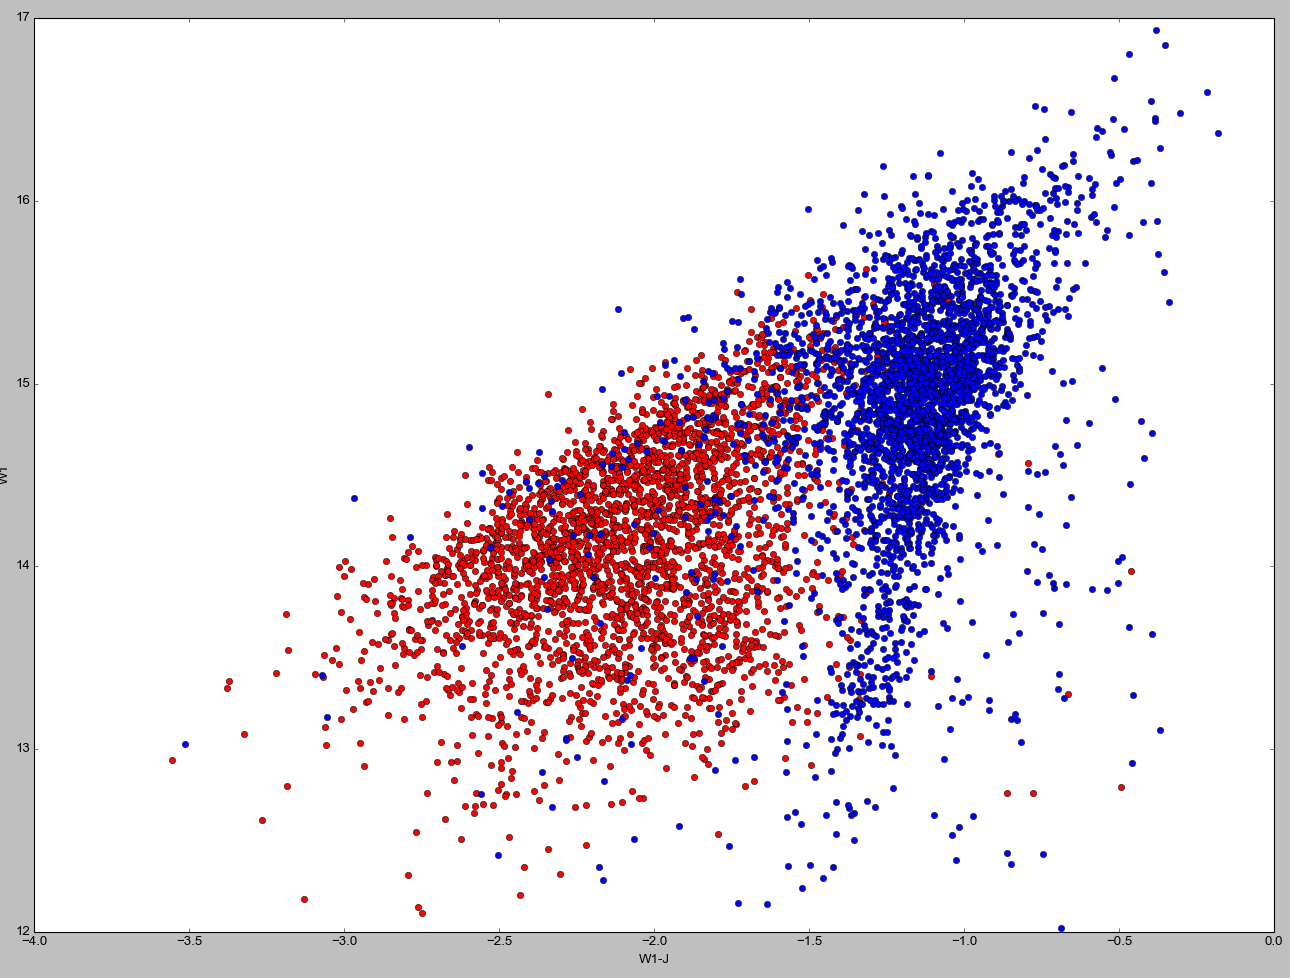

In [5]:
Image(filename='finalgood.png')

In [ ]:
Rosszul klasszifikált galaxisokból példa:
327.551848054043 -1.1426308523314
184.538480156222 56.4793895190355
131.35582408752 15.329483482338
355.787237262115 0.363187798454453
20.6434095754484 0.86632703761031
146.283027671995 0.0640483454039906
193.751917022485 27.1938415374122
259.225199731892 31.9043117898775
179.906200174983 41.7509876043945
186.784343671292 14.2388639338123
251.916088668679 35.7786782913078
234.650356462588 33.2771178320874
126.594425133506 21.8522790405918
155.590548398329 13.8496323697823
222.308482566738 23.8025049724462
148.858303867415 43.4662381757144
186.36274814425 54.1399665923338
174.132983605433 17.5013941461913
209.232526893864 11.3744296358802
176.651976049814 19.809496489452
237.360392006119 5.57122043886615
194.949036315187 28.0978860776139
175.378694980771 25.9345936631055
178.621308655281 28.7653880584361
224.464003844422 34.0124407637652
232.872095920533 18.5542845885875
181.977958351732 25.1013351601898
131.668131544475 53.9441468094125
214.200019324884 10.7283939370568
163.1155048748 -0.606720623125168
201.815763300255 4.20874873528397
188.69673389492 35.7811176139365
309.095142062499 -4.73560360273219
309.095142062499 -4.73560360273219
201.421846034193 13.9170405898229
200.394926211384 33.4897596204536
210.249960625797 28.0479698945508
234.357965099849 43.4492345298487
153.743246860458 38.1041419400781
122.503850380657 24.8967686039385

In [ ]:
Rosszul klasszifikált csillagok (mind):
208.755907878909 46.5198538743962
121.089992435973 51.8465206094779
185.403126216004 36.4945787988956
199.447664162962 17.2576414894453
197.912498609947 40.1924140682006
191.664050701083 9.30832786999133
324.565124161641 1.19747883996999
320.793535486468 1.1276388419209
251.934593419469 31.6759287638617
251.484628467065 21.9524189378875
318.652162707004 -0.495369990448287
133.738703484556 1.32165535784497
135.993685332249 11.1896429237919
116.84426644526 33.834017389141
136.627780752312 52.586237191881
257.806279908162 23.4425261379622
184.933305924867 62.0948743727762
175.773623091957 20.2774850164773
30.4663050528266 -1.06483623687939
190.413725565382 59.4822143705796
217.470523915324 34.0306044735824
165.327418574749 12.617095253623
188.223394041218 42.524782557732
225.589458827604 49.3981690053309
89.3683725234111 1.2086888105913
2.02866346210084 -0.307353613781418
139.434356273803 14.6463455705991
86.5168554775321 -0.0649772870082363
204.077334474589 3.00056345244174
69.4516535778907 26.0693923820144
153.471523757202 21.0641162212186
259.649737073258 32.4676269823202
132.635166334328 17.4637145021199
133.764967611577 45.5269694365827
241.823307695292 13.4702717714266
69.8654813787068 26.0283296678237
171.984286934501 17.9233357847605
153.646460127936 25.6339171297674
223.772759531555 23.0954116666281
126.108016385435 34.1085419213956
69.4890571279949 25.765330531689
146.024332648308 45.5199897625869
69.874755022198 25.3409781269634
70.1941965294909 25.0944369822212
186.010199925723 17.7517204990333
191.336424406238 0.954648348622345
152.996134281154 21.3126943564699
69.2637602586771 25.3494075871518
69.8669753844492 26.134137891154
163.861196325161 -0.841417890311179
120.88241567821 52.7351581260481
148.117722457811 51.1719665896002
46.4419084412996 -0.195443238016809
69.7490984870913 25.1669260585579
214.472538045504 51.7510063883208
72.4098612437908 25.4372646174714
71.7442269836986 24.869943736448
256.402988605115 32.9287145251836
257.392879387831 23.8363269289037
69.4138075054263 26.1923644614007
70.1714270223112 26.394079903329
69.5922636206559 26.1447450238297
72.0643775024371 24.547323088989
205.586471883475 56.2104540870192
69.8483259987352 26.5075459445885
247.588407425615 40.8009712106616
239.192802559816 44.2029634777098
69.7739851275612 25.327322062108
64.0057510869297 28.4084081734709
227.209456737709 43.5143834706011
64.2154091894036 28.4598280233955
123.769767330271 39.7210999753276
69.4609125502475 26.2097135730976
87.4810830528171 1.04519722224246
64.1085703947892 28.107586145249
127.79664357473 46.5191610294995
71.2256311700984 26.0375981432079
219.294339230452 20.4205975121735
171.113788530137 47.1758913849566
243.589748557952 20.6234792245428
159.579796825113 28.370304144873
72.9742424494907 25.5757995738993
237.611572074549 50.4650274016748
188.481338076225 62.5101876759692
82.9076302819998 -0.554824793170017
120.207941917422 29.7433930921393
234.740726991686 14.4273513668253
244.88160287346 30.0953997336714
220.766253030781 55.2980143652868
71.2585152082675 25.5643050510442
88.3382971549404 0.838990234589334
234.796021208989 0.434132399568175
86.042214877242 0.517662179422528
71.7612119308666 26.0084007928445
260.225614694538 29.5375521141328
69.409079280356 26.5978219773012
247.828343847005 0.495260395617011
71.1415426209932 24.6280531324407
112.99546305404 44.8640402861141
85.1819193202228 0.713984917131718
23.9070952641138 0.257365880649038
69.7902226956581 25.672575774516
122.928723217272 45.1295901882608
69.352928533249 26.1693779023874
25.6128261003244 0.291617564478798
144.386987278338 28.6392730055263
187.892493781496 54.1601261975492
69.5023061903784 26.037912611741
213.102059353262 16.5530670458305
184.97673777404 17.2982100632998
71.6348560313729 11.4722123776703
118.849310754049 33.8594388998714
71.9758999246563 25.549576060662
116.623317756148 46.1146930516974
247.344700016412 39.5067072839884
88.4023106164498 0.518676091206265
129.725838515082 46.0923926662714
246.253770586722 40.5554567059508
196.839252297106 14.8965723966583
126.571931890336 45.5747829381242
354.026446250712 0.132433118975153
333.033842789319 0.213190425050278
71.0591459645004 25.9997171021058
235.320181615559 41.1332845143488
249.889523562798 24.847035509636
87.2085021076698 -0.36671675350193
132.860547634082 45.7643429560925
47.4855013122312 1.12337076162534
71.333922665152 25.5252937388306
71.6421185624562 24.5312950009653
348.659386831137 14.7544515313668
251.891699504753 19.7398690116306
113.167305050952 45.1596682574477
70.7766828533835 25.1707074013739
70.4192333117837 24.6818838922555
133.279149998785 38.5714765762877
115.385542318414 45.2454007307252
163.782466882233 35.0730825801908
86.7705178459295 -0.706543927603689
86.9008326310741 0.570010144677908
237.823160203012 7.30855170496646
69.6961846837216 26.1092515367296
84.1316109019522 0.219357699613467
70.0504710134745 25.9024051411897
211.244411619857 53.760089835335
123.253759318596 39.9598435153123
86.540247585689 -0.993341195575485
70.3211094952727 25.6720816792358
253.080477985974 22.4593125078556
70.0160278140476 26.3905967503884
351.069394179722 0.423521653406958
236.064892960318 17.4566149090826

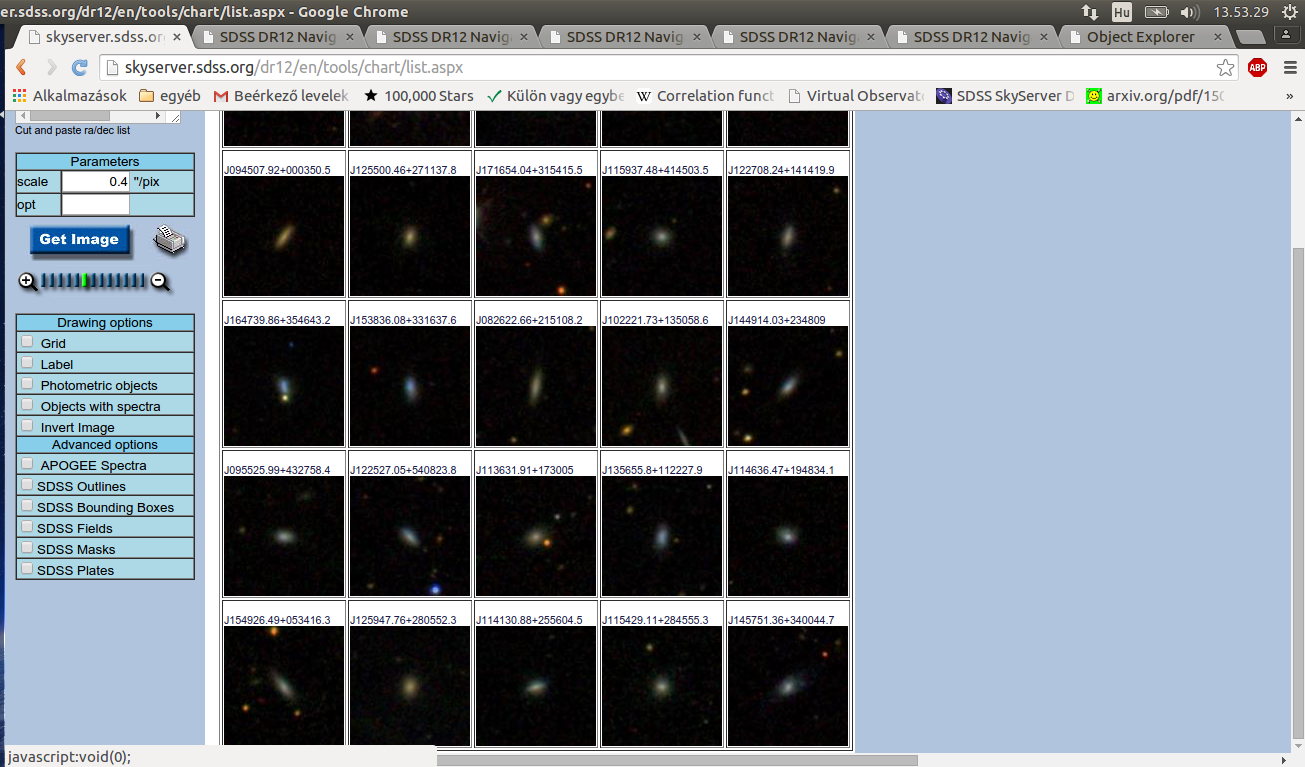

In [4]:
from IPython.display import Image
Image(filename='galaxieswronglyclass.png')

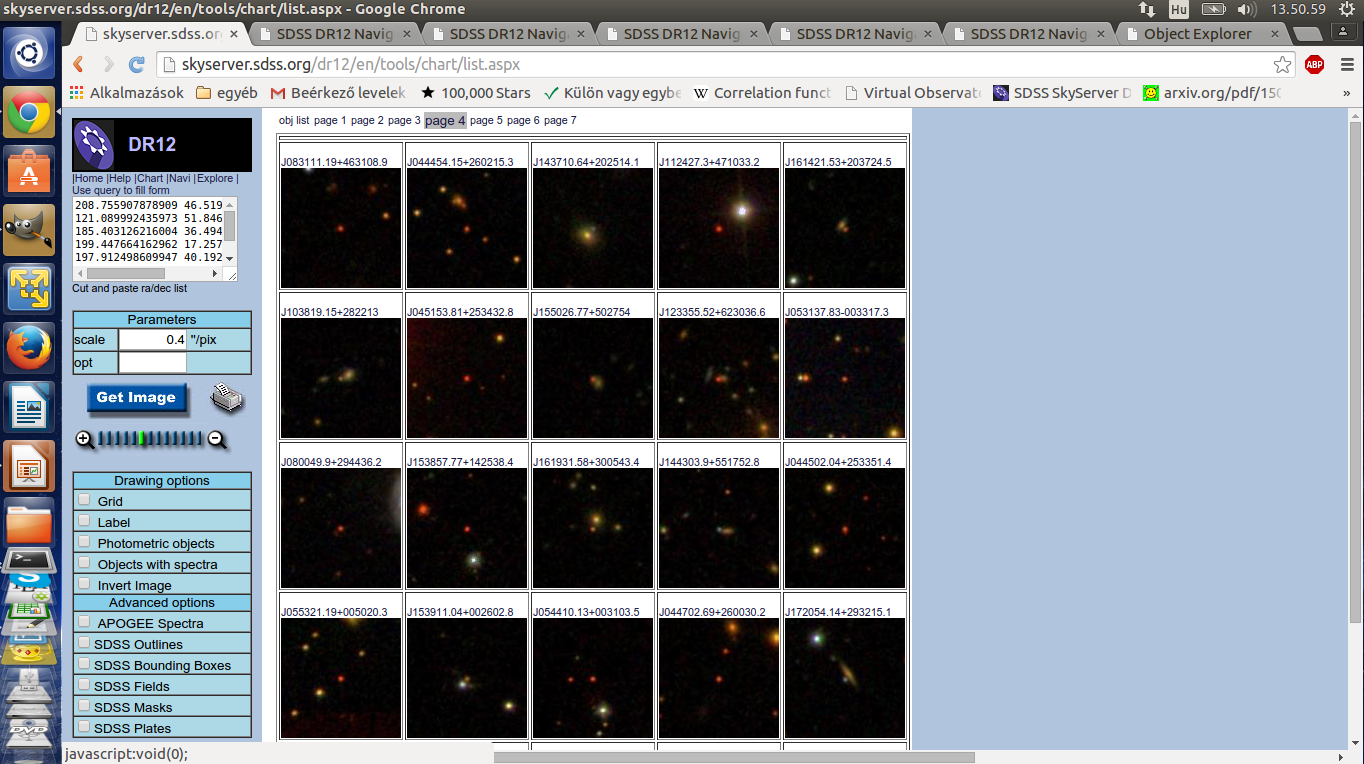

In [5]:
Image(filename='starswronglyclass.png')